In [11]:
import pandas as pd

# Charger les données
features_path = "features_hotels.csv"
df_features = pd.read_csv(features_path)

# Afficher les premières lignes des données
df_features.head()

,hotel_id,group,brand,city,parking,pool,children_policy
0,0,Yin Yang,Royal Lotus,paris,1,0,1
1,1,Independant,Independant,copenhagen,1,0,0
2,2,Independant,Independant,madrid,0,0,0
3,3,Independant,Independant,rome,1,0,0
4,4,Independant,Independant,sofia,1,0,0


In [14]:
df_features[['parking', 'pool', 'children_policy']].nunique()

parking            2
pool               2
children_policy    3
dtype: int64

## 📂 Aperçu du fichier `features_hotels.csv`

Ce fichier contient des informations détaillées sur les hôtels, notamment leur groupe, leur marque et les équipements disponibles.

### 🏨 Variables disponibles :

- **`hotel_id`** : 🆔 Identifiant unique de l'hôtel.
- **`group`** : 🏢 Groupe auquel appartient l'hôtel.
- **`brand`** : 🏷️ Marque de l'hôtel.
- **`city`** : 📍 Ville où se situe l'hôtel.
- **`parking`** : 🚗 Indique si l'hôtel dispose d'un parking (**1 = Oui, 0 = Non**).
- **`pool`** : 🏊 Indique si l'hôtel dispose d'une piscine (**1 = Oui, 0 = Non**).
- **`children_policy`** : 👶 Politique d'accueil des enfants :
  - **`0`** → ❌ **Non accepté** (L'hôtel ne permet pas d'accueillir des enfants).
  - **`1`** → ⚠️ **Accepté avec restrictions** (L'hôtel accepte les enfants sous certaines conditions).
  - **`2`** → ✅ **Accepté sans restrictions** (L'hôtel accueille les enfants sans conditions particulières).

---

🔍 **Prochaine étape** : Vérification des **valeurs manquantes** et analyse des **distributions des variables** ! 📊

In [3]:
# Vérifier les valeurs manquantes
missing_values = df_features.isnull().sum()

# Statistiques descriptives des variables numériques
summary_stats = df_features.describe()

missing_values, summary_stats

(hotel_id           0
 group              0
 brand              0
 city               0
 parking            0
 pool               0
 children_policy    0
 dtype: int64,
          hotel_id     parking        pool  children_policy
 count  999.000000  999.000000  999.000000       999.000000
 mean   499.000000    0.442442    0.169169         0.067067
 std    288.530761    0.496925    0.375089         0.304453
 min      0.000000    0.000000    0.000000         0.000000
 25%    249.500000    0.000000    0.000000         0.000000
 50%    499.000000    0.000000    0.000000         0.000000
 75%    748.500000    1.000000    0.000000         0.000000
 max    998.000000    1.000000    1.000000         2.000000)

**Analyse des valeurs manquantes et des statistiques descriptives :**
- Aucune valeur manquante dans le fichier features_hotels.csv, ce qui est une bonne nouvelle.

**Variables numériques :**
   
- **Parking :** Environ 44,2 % des hôtels disposent d'un parking.
- **Piscine :** Seulement 16,9 % des hôtels ont une piscine.
- **Children Policy :** La majorité des hôtels n'acceptent pas les enfants (93,3 % → 0), tandis que 6,7 % appliquent des restrictions (1) ou les acceptent sans condition (2). Les hôtels familiaux étant minoritaires, leur impact sur les prix mérite une analyse plus approfondie.

### Je vais maintenant analyser les distributions des variables catégorielles suivantes : group, brand et city

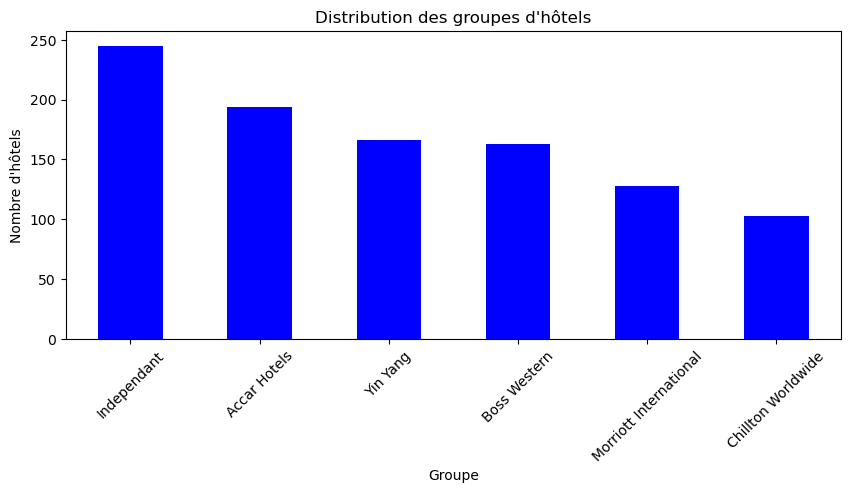

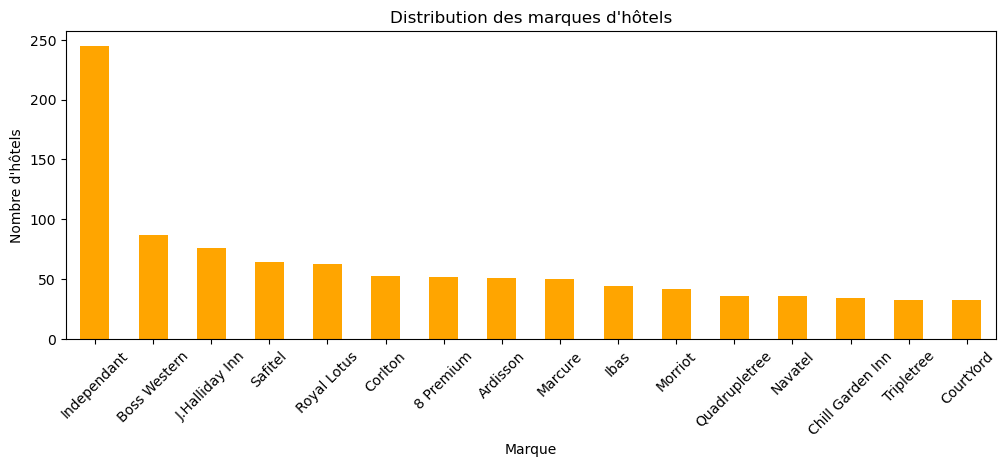

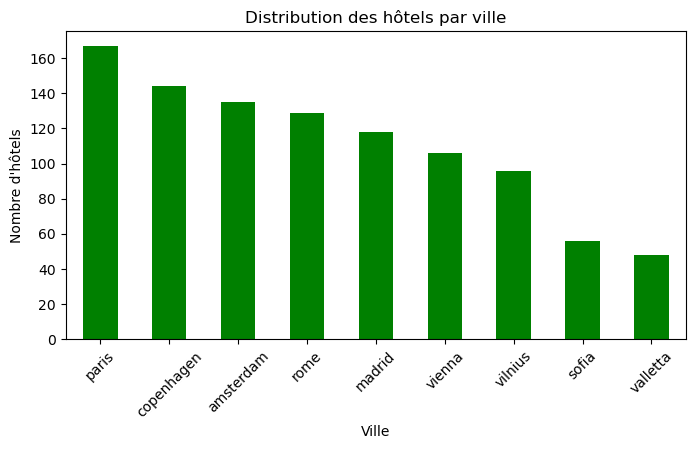

In [4]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt

# Création des graphiques

# Distribution des groupes d'hôtels
plt.figure(figsize=(10, 4))
df_features['group'].value_counts().plot(kind='bar', color='blue')
plt.title("Distribution des groupes d'hôtels")
plt.xlabel("Groupe")
plt.ylabel("Nombre d'hôtels")
plt.xticks(rotation=45)
plt.show()

# Distribution des marques d'hôtels
plt.figure(figsize=(12, 4))
df_features['brand'].value_counts().plot(kind='bar', color='orange')
plt.title("Distribution des marques d'hôtels")
plt.xlabel("Marque")
plt.ylabel("Nombre d'hôtels")
plt.xticks(rotation=45)
plt.show()

# Distribution des hôtels par ville
plt.figure(figsize=(8, 4))
df_features['city'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution des hôtels par ville")
plt.xlabel("Ville")
plt.ylabel("Nombre d'hôtels")
plt.xticks(rotation=45)
plt.show()

Voici les distributions des variables catégorielles :

1. **Groupes d'hôtels :** Certains groupes dominent le marché, tandis que d'autres sont moins représentés.
2. **Marques d'hôtels :** Beaucoup d'hôtels sont indépendants, mais certaines marques ont une présence significative.
3. **Villes :** La répartition des hôtels varie selon les villes, certaines étant plus représentées que d'autres.

### Je vais maintenant examiner la corrélation entre les variables numériques et vérifier l'impact potentiel de certaines caractéristiques sur les prix.

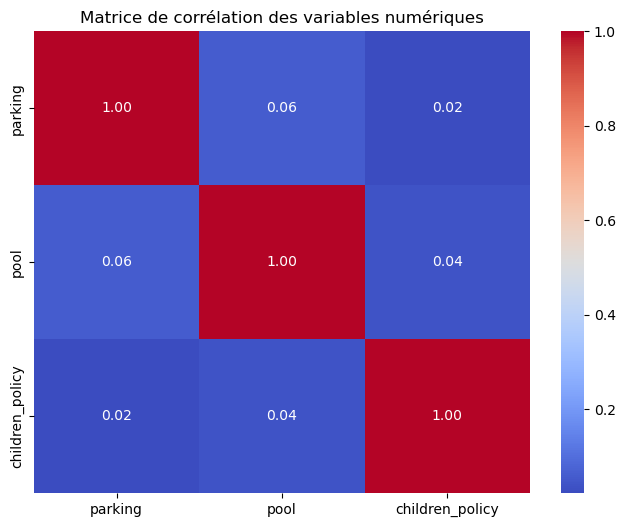

In [15]:
# Import des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifier si le fichier est bien rechargé
if 'df_features' in locals():
    # Suppression de la variable 'hotel_id'
    df_corr = df_features.drop(columns=['hotel_id'])
    
    # Matrice de corrélation
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matrice de corrélation des variables numériques")
    plt.show()
else:
    print("Le fichier features_hotels.csv n'est pas disponible. Merci de le réuploader.")

**La matrice de corrélation montre que :**

- Les variables parking, pool et children_policy ne présentent pas de corrélations marquées entre elles.
  
Nous avons maintenant une bonne vue d'ensemble des caractéristiques des hôtels.

###  L'étape suivante consiste à examiner le fichier **test_set.csv** pour comprendre comment il est structuré.

In [16]:
test_path = "test_set.csv"
df_test = pd.read_csv(test_path)

# Afficher les premières lignes des données
df_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


# Le fichier `test_set.csv` contient les variables suivantes :

- **index** : Identifiant unique de la ligne.
- **order_requests** : Nombre de demandes pour l'hôtel.
- **city** : Ville de réservation.
- **date** : Jour de la réservation (probablement un jour du mois).
- **language** : Langue du client.
- **mobile** : Indique si la réservation a été effectuée sur mobile (**0 = Non, 1 = Oui**).
- **avatar_id** : Identifiant de l'utilisateur.
- **hotel_id** : Identifiant de l'hôtel (**qui permet de relier avec `features_hotels.csv`**).
- **stock** : Stock disponible de chambres.

L'étape suivante est d'explorer la relation entre ces variables et de voir comment nous pouvons les intégrer dans le modèle de machine learning. Avant cela, je vais vérifier les **valeurs manquantes** et les **distributions des variables**.

In [9]:
# Vérification des valeurs manquantes dans test_set.csv
missing_values_test = df_test.isnull().sum()

# Statistiques descriptives des variables numériques
summary_stats_test = df_test.describe()

missing_values_test, summary_stats_test

(index             0
 order_requests    0
 city              0
 date              0
 language          0
 mobile            0
 avatar_id         0
 hotel_id          0
 stock             0
 dtype: int64,
              index  order_requests         date       mobile    avatar_id  \
 count  6644.000000     6644.000000  6644.000000  6644.000000  6644.000000   
 mean   3321.500000      419.312763    15.201084     0.453642   381.219597   
 std    1918.101926      246.445963    13.783346     0.497884   243.526271   
 min       0.000000        1.000000     0.000000     0.000000     1.000000   
 25%    1660.750000      202.000000     3.000000     0.000000   171.000000   
 50%    3321.500000      415.500000    15.000000     0.000000   381.000000   
 75%    4982.250000      636.000000    21.000000     1.000000   589.250000   
 max    6643.000000      844.000000    40.000000     1.000000   794.000000   
 
           hotel_id        stock  
 count  6644.000000  6644.000000  
 mean    472.193709   

# 📊 Analyse du fichier `test_set.csv`

### ✅ Aucune valeur manquante
Cela simplifie l'analyse et le traitement des données.

### 📈 Distributions des variables :
- **order_requests** : Moyenne d’environ **419 requêtes** par hôtel, avec un maximum à **844**.
- **date** : Réparti entre **0 et 40**, ce qui pourrait représenter des jours avant la réservation.
- **mobile** : **45,3 %** des réservations sont effectuées sur mobile.
- **avatar_id** : Identification unique des clients.
- **stock** : Nombre moyen de chambres disponibles **≈ 23**, mais avec de grandes variations (**min = 0, max = 199**).

🔍 Je vais maintenant examiner la **distribution de quelques variables** pour mieux comprendre les tendances.


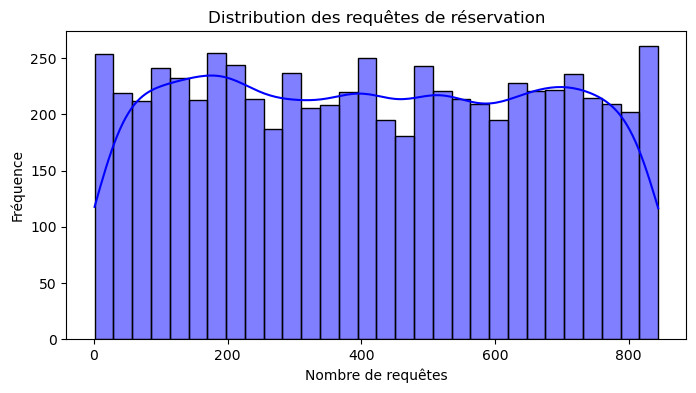

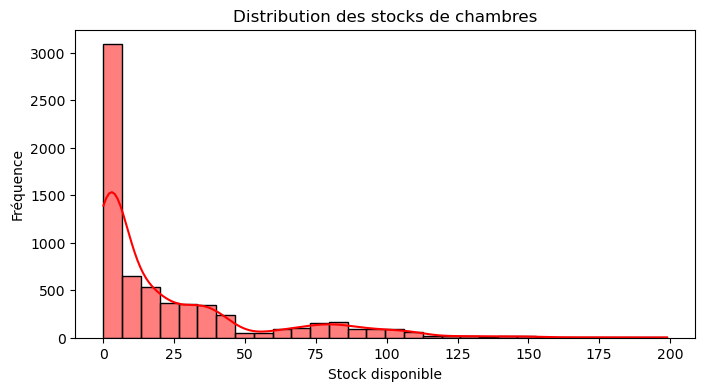

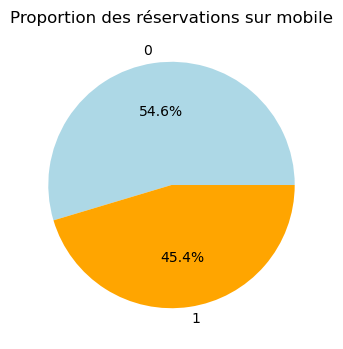

In [10]:
# Visualisation de la distribution des variables clés

# Distribution des requêtes de réservation
plt.figure(figsize=(8, 4))
sns.histplot(df_test['order_requests'], bins=30, kde=True, color='blue')
plt.title("Distribution des requêtes de réservation")
plt.xlabel("Nombre de requêtes")
plt.ylabel("Fréquence")
plt.show()

# Distribution des stocks de chambres
plt.figure(figsize=(8, 4))
sns.histplot(df_test['stock'], bins=30, kde=True, color='red')
plt.title("Distribution des stocks de chambres")
plt.xlabel("Stock disponible")
plt.ylabel("Fréquence")
plt.show()

# Proportion des réservations sur mobile
plt.figure(figsize=(6, 4))
df_test['mobile'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Proportion des réservations sur mobile")
plt.ylabel("")
plt.show()

# 🔍 Observations des distributions

- **Réservations (`order_requests`)** : La distribution est **asymétrique**, avec une majorité d'hôtels recevant **moins de 500 demandes**.
- **Stock de chambres** : Très **variable**, certains hôtels ont **peu de chambres disponibles**, tandis que d'autres en ont **jusqu'à 199**.
- **Réservations sur mobile** : Environ **45 % des réservations** sont faites sur mobile, ce qui représente une proportion importante.

### Nous avons maintenant une **bonne vision des données**.  

### 🚀 Étape suivante : Préparation des données pour la modélisation
1. **Le nettoyage et l'encodage des variables catégorielles.**
2. **La fusion des datasets (`features_hotels.csv` et `test_set.csv`).**
3. **L'ingénierie des features si nécessaire.**

In [22]:
from sklearn.preprocessing import LabelEncoder

# Fusionner les datasets sur 'hotel_id'
df_merged = df_test.merge(df_features, on='hotel_id', how='left')

# Vérifier les valeurs manquantes après la fusion
missing_values = df_merged.isnull().sum()

# Afficher les premières lignes du dataset fusionné
missing_values, df_merged.head()

(index              0
 order_requests     0
 city_x             0
 date               0
 language           0
 mobile             0
 avatar_id          0
 hotel_id           0
 stock              0
 group              0
 brand              0
 city_y             0
 parking            0
 pool               0
 children_policy    0
 dtype: int64,
    index  order_requests   city_x  date  language  mobile  avatar_id  \
 0      0               1  vilnius    21  romanian       0          1   
 1      1               1  vilnius    21  romanian       0          1   
 2      2               1  vilnius    21  romanian       0          1   
 3      3               1  vilnius    21  romanian       0          1   
 4      4               1  vilnius    21  romanian       0          1   
 
    hotel_id  stock         group           brand   city_y  parking  pool  \
 0       161     46  Boss Western  J.Halliday Inn  vilnius        1     0   
 1       187     32  Accar Hotels         Marcure  vilnius   

# 🔗 Fusion des datasets

La **fusion des datasets** a été effectuée avec succès, et **aucune valeur manquante** n'est apparue après la fusion.

### 📌 Changements et observations :
- **`city_x`** (provenant de `test_set.csv`) et **`city_y`** (provenant de `features_hotels.csv`) sont **identiques** → Nous pourrons garder une seule de ces colonnes.
- Nous avons maintenant **les caractéristiques des hôtels intégrées** dans les données de test.

---

### 🚀 Étape suivante : Prétraitement des données
1. **Suppression des colonnes inutiles** (`index`, `city_y` car elle est redondante avec `city_x`).
2. **Encodage des variables catégorielles** (`group`, `brand`, `city_x`, `language`).
3. **Standardisation des variables numériques si nécessaire**.

In [23]:
# Vérifier si city_x et city_y sont identiques
identical_cities = (df_merged['city_x'] == df_merged['city_y']).all()

if identical_cities:
    print("Les colonnes 'city_x' et 'city_y' sont identiques. Nous pouvons supprimer 'city_y'.")
else:
    print("Les colonnes 'city_x' et 'city_y' sont différentes.")

# Supprimer city_y si elles sont identiques
df_merged.drop(columns=['city_y'], inplace=True)

Les colonnes 'city_x' et 'city_y' sont identiques. Nous pouvons supprimer 'city_y'.


In [26]:
# Suppression des colonnes inutiles
df_merged.drop(columns=['index'], inplace=True, errors='ignore')

# Encodage des variables catégorielles
categorical_cols = ['group', 'brand', 'city_x', 'language']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_merged[col] = le.fit_transform(df_merged[col])
    label_encoders[col] = le  # Stocker les encoders pour une future utilisation

# Vérification après encodage
df_merged.head()

,order_requests,city_x,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,1,8,21,22,0,1,161,46,1,8,1,0,0
1,1,8,21,22,0,1,187,32,0,9,1,1,0
2,1,8,21,22,0,1,279,12,3,7,1,0,0
3,1,8,21,22,0,1,395,10,0,6,0,0,0
4,1,8,21,22,0,1,488,42,0,14,1,1,1


# 🔢 Encodage des variables catégorielles

L'**encodage des variables catégorielles** a été réalisé avec succès.  
Les colonnes **`group`**, **`brand`**, **`city_x`** et **`language`** ont été transformées en valeurs numériques.

---

### 🚀 Étape suivante : Construction et entraînement du modèle
Nous allons :
1. **Diviser les données** en jeu d'entraînement et de test.
2. **Tester plusieurs modèles de régression** (Régression Linéaire, Random Forest, XGBoost).
3. **Optimiser les hyperparamètres** via **validation croisée**.

Je vais commencer par diviser les données et tester un premier modèle. 🎯

In [14]:
df_merged.shape

(6644, 13)